<a href="https://colab.research.google.com/github/fernandopaguiar/fernandopaguiar/blob/main/Scout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
#Importando os pacotes necessários

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
#Importando os dados que estão em arquivs "txt"
#Cada base de dados apresenta tipos diferentes de estatísticas

argentina = pd.read_table('argentina.txt', sep=',')
argentina1 = pd.read_table('argentina1.txt', sep=',')
argentina2 = pd.read_table('argentina2.txt', sep=',')

In [208]:
#Tabela com estatísticas gerais: "Tempo de jogo", "Desempenho" e "A cada 90 minutos"
argentina.columns

Index(['Class.', 'Jogador', 'Nação', 'Pos.', 'Equipe', 'Idade', 'Nascimento',
       'MP', 'Inícios', 'Min.', '90s', 'Gols', 'Assis.', 'G+A', 'G-PB', 'PB',
       'PT', 'CrtsA', 'CrtV', 'PrgC', 'PrgP', 'PrgR', 'Gols.1', 'Assis..1',
       'G+A.1', 'G-PB.1', 'G+A-PB', 'Partidas', '-9999'],
      dtype='object')

In [209]:
#Tabela com estatísticas de chutes
argentina1.columns

Index(['Class.', 'Jogador', 'Nação', 'Pos.', 'Equipe', 'Idade', 'Nascimento',
       '90s', 'Gols', 'TC', 'CaG', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT',
       'Dist', 'PB', 'PT', 'Partidas', '-9999'],
      dtype='object')

In [210]:
#Tabela com estatísticas variadas
argentina2.columns

Index(['Class.', 'Jogador', 'Nação', 'Pos.', 'Equipe', 'Idade', 'Nascimento',
       '90s', 'CrtsA', 'CrtV', '2CrdY', 'Fts', 'FltsP', 'Desativado', 'Crz',
       'Crts', 'TklW', 'Pênaltis convertidos', 'PKcon', 'OG', 'Partidas',
       '-9999'],
      dtype='object')

In [211]:
#Número de linhas e colunas da Tabela
argentina.shape

(884, 29)

In [212]:
#Comando para visualizar todas as colunas da tabela
pd.set_option('display.max_columns', None)

#Visualizando as 5 primeiras linhas da tabela "argentina" com o comando '.head'
argentina.head()

,Class.,Jogador,Nação,Pos.,Equipe,Idade,Nascimento,MP,Inícios,Min.,90s,Gols,Assis.,G+A,G-PB,PB,PT,CrtsA,CrtV,PrgC,PrgP,PrgR,Gols.1,Assis..1,G+A.1,G-PB.1,G+A-PB,Partidas,-9999
0,1,Luciano Abecasis,ar ARG,ZG,Banfield,31.0,1990.0,15,13,1.153,12.8,0,0,0,0,0,0,8,1,NaN,NaN,NaN,0,0,0,0,0,Partidas,6c510f2d
1,2,Ramón Ábila,ar ARG,AT,Colón,32.0,1989.0,23,22,1.964,21.8,8,0,8,7,1,1,8,1,NaN,NaN,NaN,37,0,37,32,32,Partidas,db5ee72d
2,3,Gonzalo Abrego,ar ARG,LT,Godoy Cruz,22.0,2000.0,24,24,1.699,18.9,2,2,4,2,0,0,2,0,NaN,NaN,NaN,11,11,21,11,21,Partidas,de8bad41
3,4,Jonás Acevedo,ar ARG,LT,Patronato,24.0,1997.0,24,20,1.788,19.9,5,4,9,3,2,2,4,0,NaN,NaN,NaN,25,20,45,15,35,Partidas,0b419c37
4,5,Lucas Acevedo,ar ARG,ZG,Colón,30.0,1991.0,9,6,591.000,6.6,0,0,0,0,0,0,2,0,NaN,NaN,NaN,0,0,0,0,0,Partidas,6494b66c


In [213]:
#Excluindo as colunas que não serão utilizadas com o comando .drop e axis=1 para pular uma coluna e não uma linha.
argentina.drop(['Class.','PrgC', 'PrgP', 'PrgR','Partidas', '-9999'], axis=1, inplace=True)
argentina1.drop(['Class.','Partidas', '-9999', 'Dist'], axis=1, inplace=True)
argentina2.drop(['Class.','Partidas', '-9999', 'Pênaltis convertidos','PKcon'], axis=1, inplace=True)

In [214]:
#Localizando linhas duplicadas com base na coluna 'Jogador'
duplicatas = argentina[argentina.duplicated(subset='Jogador', keep=False)]
duplicatas

,Jogador,Nação,Pos.,Equipe,Idade,Nascimento,MP,Inícios,Min.,90s,Gols,Assis.,G+A,G-PB,PB,PT,CrtsA,CrtV,Gols.1,Assis..1,G+A.1,G-PB.1,G+A-PB
23,Rodrigo Aliendro,ar ARG,LT,Colón,30.0,1991.0,4,3,288.000,3.2,0,0,0,0,0,0,1,0,0,0,0,0,0
24,Rodrigo Aliendro,ar ARG,LT,River Plate,30.0,1991.0,11,7,589.000,6.5,0,0,0,0,0,0,1,1,0,0,0,0,0
83,Lucas Beltrán,ar ARG,AT,Colón,20.0,2001.0,1,1,90.000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0
84,Lucas Beltrán,ar ARG,AT,River Plate,20.0,2001.0,21,15,1.190,13.2,4,3,7,4,0,0,1,0,30,23,53,30,53
112,Walter Bou,ar ARG,ATLT,Vélez Sarsf,28.0,1993.0,18,13,1.068,11.9,5,1,6,1,4,4,0,0,42,8,51,8,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Vicente Taborda,ar ARG,AT,Boca Juniors,20.0,2001.0,1,0,1.000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
820,Gastón Togni,ar ARG,LT,Independiente,24.0,1997.0,3,1,96.000,1.1,0,0,0,0,0,0,0,0,0,0,0,0,0
821,Gastón Togni,ar ARG,LTAT,Defensa y Just,24.0,1997.0,22,22,1.948,21.6,3,8,11,3,0,0,2,0,14,37,51,14,51
834,Franco Troyansky,ar ARG,ATLT,Lanús,24.0,1997.0,15,15,1.096,12.2,1,1,2,0,1,1,2,0,8,8,16,0,8


In [215]:
#Linhas duplicadas são agrupadas e somadas em algumas colunas, outras se mantém a da primeira coluna
argentina = argentina.groupby('Jogador').agg({
   'Nação': 'first', 'Pos.': 'first', 'Equipe': 'first', 'Idade': 'first', 'Nascimento': 'first',
   'MP': 'sum', 'Inícios': 'sum', 'Min.': 'sum', '90s': 'sum', 'Gols': 'sum', 'Assis.': 'sum', 'G+A': 'sum', 'G-PB': 'sum', 'PB': 'sum',
   'PT': 'sum', 'CrtsA': 'sum', 'CrtV': 'sum', 'Gols.1': 'sum', 'Assis..1': 'sum',
   'G+A.1': 'sum', 'G-PB.1': 'sum', 'G+A-PB': 'sum'
}).reset_index()

argentina

,Jogador,Nação,Pos.,Equipe,Idade,Nascimento,MP,Inícios,Min.,90s,Gols,Assis.,G+A,G-PB,PB,PT,CrtsA,CrtV,Gols.1,Assis..1,G+A.1,G-PB.1,G+A-PB
0,Aaron Nicolás Molinas,ar ARG,LTAT,Boca Juniors,21.0,2000.0,14,5,509.000,5.7,0,1,1,0,0,0,2,0,0,18,18,0,18
1,Aaron Quirós,ar ARG,ZG,Banfield,20.0,2001.0,9,7,538.000,6.0,1,0,1,1,0,0,4,1,17,0,17,17,17
2,Aarón Martínez,ar ARG,LT,Colón,20.0,2001.0,1,1,57.000,0.6,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Aarón Spetale,ar ARG,AT,Estudiantes,21.0,2000.0,2,0,20.000,0.2,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Abel Amaya,ar ARG,LT,Banfield,19.0,2002.0,1,1,90.000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,Yonathan Cabral,ar ARG,ZG,Lanús,29.0,1992.0,12,11,991.000,11.0,1,0,1,1,0,0,4,0,9,0,9,9,9
845,Zahir Mansilla,ar ARG,ZG,Newell's OB,22.0,1999.0,14,7,719.000,8.0,0,0,0,0,0,0,1,0,0,0,0,0,0
846,Ángel González,ar ARG,LTAT,Lanús,27.0,1994.0,5,4,326.000,3.6,0,1,1,0,0,0,1,0,0,290,290,0,290
847,Ángelo Martino,ar ARG,ZG,Talleres,23.0,1998.0,15,8,692.000,7.7,0,1,1,0,0,0,4,0,0,13,13,0,13


In [216]:
##Visualizando as 5 primeiras linhas da tabela "argentina1" com o comando '.head'
argentina1.head()

,Jogador,Nação,Pos.,Equipe,Idade,Nascimento,90s,Gols,TC,CaG,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,PB,PT
0,Luciano Abecasis,ar ARG,ZG,Banfield,31.0,1990.0,12.8,0,2,1,500.0,16,8,0.0,0.0,0,0
1,Ramón Ábila,ar ARG,AT,Colón,32.0,1989.0,21.8,8,50,12,240.0,229,55,14.0,58.0,1,1
2,Gonzalo Abrego,ar ARG,LT,Godoy Cruz,22.0,2000.0,18.9,2,18,6,333.0,95,32,11.0,33.0,0,0
3,Jonás Acevedo,ar ARG,LT,Patronato,24.0,1997.0,19.9,5,39,13,333.0,196,65,8.0,23.0,2,2
4,Lucas Acevedo,ar ARG,ZG,Colón,30.0,1991.0,6.6,0,11,2,182.0,168,30,0.0,0.0,0,0


In [217]:
duplicatas1 = argentina1[argentina1.duplicated(subset='Jogador', keep=False)]
duplicatas1

,Jogador,Nação,Pos.,Equipe,Idade,Nascimento,90s,Gols,TC,CaG,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,PB,PT
23,Rodrigo Aliendro,ar ARG,LT,Colón,30.0,1991.0,3.2,0,4,0,0.0,125,0,0.0,NaN,0,0
24,Rodrigo Aliendro,ar ARG,LT,River Plate,30.0,1991.0,6.5,0,10,3,300.0,153,46,0.0,0.0,0,0
83,Lucas Beltrán,ar ARG,AT,Colón,20.0,2001.0,1.0,0,2,2,1000.0,200,200,0.0,0.0,0,0
84,Lucas Beltrán,ar ARG,AT,River Plate,20.0,2001.0,13.2,4,24,9,375.0,182,68,17.0,44.0,0,0
112,Walter Bou,ar ARG,ATLT,Vélez Sarsf,28.0,1993.0,11.9,5,22,4,182.0,185,34,5.0,25.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Vicente Taborda,ar ARG,AT,Boca Juniors,20.0,2001.0,0.0,0,0,0,NaN,0,0,NaN,NaN,0,0
820,Gastón Togni,ar ARG,LT,Independiente,24.0,1997.0,1.1,0,2,1,500.0,187,94,0.0,0.0,0,0
821,Gastón Togni,ar ARG,LTAT,Defensa y Just,24.0,1997.0,21.6,3,41,10,244.0,189,46,7.0,30.0,0,0
834,Franco Troyansky,ar ARG,ATLT,Lanús,24.0,1997.0,12.2,1,27,7,259.0,222,57,0.0,0.0,1,1


In [218]:
argentina1 = argentina1.groupby('Jogador').agg({
   'Nação': 'first', 'Pos.': 'first', 'Equipe': 'first', 'Idade': 'first', 'Nascimento': 'first',
   '90s': 'sum', 'Gols': 'sum', 'TC': 'sum', 'CaG': 'sum', 'SoT%': 'sum', 'Sh/90': 'sum', 'SoT/90': 'sum', 'G/Sh': 'sum', 'G/SoT': 'sum',
   'PB': 'sum', 'PT': 'sum'
}).reset_index()

argentina1

,Jogador,Nação,Pos.,Equipe,Idade,Nascimento,90s,Gols,TC,CaG,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,PB,PT
0,Aaron Nicolás Molinas,ar ARG,LTAT,Boca Juniors,21.0,2000.0,5.7,0,12,7,583.0,212,124,0.0,0.0,0,0
1,Aaron Quirós,ar ARG,ZG,Banfield,20.0,2001.0,6.0,1,8,1,125.0,134,17,13.0,100.0,0,0
2,Aarón Martínez,ar ARG,LT,Colón,20.0,2001.0,0.6,0,0,0,0.0,0,0,0.0,0.0,0,0
3,Aarón Spetale,ar ARG,AT,Estudiantes,21.0,2000.0,0.2,0,0,0,0.0,0,0,0.0,0.0,0,0
4,Abel Amaya,ar ARG,LT,Banfield,19.0,2002.0,1.0,0,0,0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,Yonathan Cabral,ar ARG,ZG,Lanús,29.0,1992.0,11.0,1,7,3,429.0,64,27,14.0,33.0,0,0
845,Zahir Mansilla,ar ARG,ZG,Newell's OB,22.0,1999.0,8.0,0,5,0,0.0,63,0,0.0,0.0,0,0
846,Ángel González,ar ARG,LTAT,Lanús,27.0,1994.0,3.6,0,2,1,500.0,61,31,0.0,0.0,0,0
847,Ángelo Martino,ar ARG,ZG,Talleres,23.0,1998.0,7.7,0,7,3,429.0,91,39,0.0,0.0,0,0


In [219]:
#Visualizando as 5 primeiras linhas da tabela "argentina2" com o comando '.head'
argentina2.head()

,Jogador,Nação,Pos.,Equipe,Idade,Nascimento,90s,CrtsA,CrtV,2CrdY,Fts,FltsP,Desativado,Crz,Crts,TklW,OG
0,Luciano Abecasis,ar ARG,ZG,Banfield,31.0,1990.0,12.8,8,1,1,22,18,0,59,17,20,1
1,Ramón Ábila,ar ARG,AT,Colón,32.0,1989.0,21.8,8,1,1,18,13,45,8,1,2,0
2,Gonzalo Abrego,ar ARG,LT,Godoy Cruz,22.0,2000.0,18.9,2,0,0,16,7,1,15,13,23,0
3,Jonás Acevedo,ar ARG,LT,Patronato,24.0,1997.0,19.9,4,0,0,24,37,4,75,12,10,0
4,Lucas Acevedo,ar ARG,ZG,Colón,30.0,1991.0,6.6,2,0,0,9,3,2,0,3,4,0


In [220]:
duplicatas2 = argentina2[argentina2.duplicated(subset='Jogador', keep=False)]
duplicatas2

,Jogador,Nação,Pos.,Equipe,Idade,Nascimento,90s,CrtsA,CrtV,2CrdY,Fts,FltsP,Desativado,Crz,Crts,TklW,OG
23,Rodrigo Aliendro,ar ARG,LT,Colón,30.0,1991.0,3.2,1,0,0,4,8,0,0,4,8,0
24,Rodrigo Aliendro,ar ARG,LT,River Plate,30.0,1991.0,6.5,1,1,0,9,10,0,10,10,9,0
83,Lucas Beltrán,ar ARG,AT,Colón,20.0,2001.0,1.0,0,0,0,3,3,0,0,0,0,0
84,Lucas Beltrán,ar ARG,AT,River Plate,20.0,2001.0,13.2,1,0,0,15,22,1,5,3,7,0
112,Walter Bou,ar ARG,ATLT,Vélez Sarsf,28.0,1993.0,11.9,0,0,0,12,13,4,39,5,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Vicente Taborda,ar ARG,AT,Boca Juniors,20.0,2001.0,0.0,0,0,0,0,0,0,0,1,0,0
820,Gastón Togni,ar ARG,LT,Independiente,24.0,1997.0,1.1,0,0,0,0,0,1,4,0,2,0
821,Gastón Togni,ar ARG,LTAT,Defensa y Just,24.0,1997.0,21.6,2,0,0,14,21,11,108,10,12,0
834,Franco Troyansky,ar ARG,ATLT,Lanús,24.0,1997.0,12.2,2,0,0,17,12,8,12,5,13,0


In [221]:
argentina2 = argentina2.groupby('Jogador').agg({
   'Nação': 'first', 'Pos.':'first', 'Equipe':'first', 'Idade':'first', 'Nascimento':'first',
   '90s': 'sum', 'CrtsA': 'sum', 'CrtV': 'sum', '2CrdY': 'sum', 'Fts': 'sum', 'FltsP': 'sum', 'Desativado': 'sum', 'Crz': 'sum',
   'Crts': 'sum', 'TklW': 'sum', 'OG': 'sum'
}).reset_index()

argentina2

,Jogador,Nação,Pos.,Equipe,Idade,Nascimento,90s,CrtsA,CrtV,2CrdY,Fts,FltsP,Desativado,Crz,Crts,TklW,OG
0,Aaron Nicolás Molinas,ar ARG,LTAT,Boca Juniors,21.0,2000.0,5.7,2,0,0,4,9,0,26,6,7,0
1,Aaron Quirós,ar ARG,ZG,Banfield,20.0,2001.0,6.0,4,1,1,10,3,1,7,17,7,0
2,Aarón Martínez,ar ARG,LT,Colón,20.0,2001.0,0.6,0,0,0,0,0,0,1,0,1,0
3,Aarón Spetale,ar ARG,AT,Estudiantes,21.0,2000.0,0.2,1,0,0,1,0,0,0,0,0,0
4,Abel Amaya,ar ARG,LT,Banfield,19.0,2002.0,1.0,0,0,0,1,1,0,6,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,Yonathan Cabral,ar ARG,ZG,Lanús,29.0,1992.0,11.0,4,0,0,4,3,0,0,18,11,0
845,Zahir Mansilla,ar ARG,ZG,Newell's OB,22.0,1999.0,8.0,1,0,0,7,1,0,1,21,9,0
846,Ángel González,ar ARG,LTAT,Lanús,27.0,1994.0,3.6,1,0,0,7,7,1,10,0,4,0
847,Ángelo Martino,ar ARG,ZG,Talleres,23.0,1998.0,7.7,4,0,0,8,0,0,19,11,11,0


In [222]:
#O método pd.merge do pandas faz a junção das tabelas baseada na coluna 'jogador' que tem o nome de cada jogador.
argentina = pd.merge(argentina, argentina1, on='Jogador')
argentina

,Jogador,Nação_x,Pos._x,Equipe_x,Idade_x,Nascimento_x,MP,Inícios,Min.,90s_x,Gols_x,Assis.,G+A,G-PB,PB_x,PT_x,CrtsA,CrtV,Gols.1,Assis..1,G+A.1,G-PB.1,G+A-PB,Nação_y,Pos._y,Equipe_y,Idade_y,Nascimento_y,90s_y,Gols_y,TC,CaG,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,PB_y,PT_y
0,Aaron Nicolás Molinas,ar ARG,LTAT,Boca Juniors,21.0,2000.0,14,5,509.000,5.7,0,1,1,0,0,0,2,0,0,18,18,0,18,ar ARG,LTAT,Boca Juniors,21.0,2000.0,5.7,0,12,7,583.0,212,124,0.0,0.0,0,0
1,Aaron Quirós,ar ARG,ZG,Banfield,20.0,2001.0,9,7,538.000,6.0,1,0,1,1,0,0,4,1,17,0,17,17,17,ar ARG,ZG,Banfield,20.0,2001.0,6.0,1,8,1,125.0,134,17,13.0,100.0,0,0
2,Aarón Martínez,ar ARG,LT,Colón,20.0,2001.0,1,1,57.000,0.6,0,0,0,0,0,0,0,0,0,0,0,0,0,ar ARG,LT,Colón,20.0,2001.0,0.6,0,0,0,0.0,0,0,0.0,0.0,0,0
3,Aarón Spetale,ar ARG,AT,Estudiantes,21.0,2000.0,2,0,20.000,0.2,0,0,0,0,0,0,1,0,0,0,0,0,0,ar ARG,AT,Estudiantes,21.0,2000.0,0.2,0,0,0,0.0,0,0,0.0,0.0,0,0
4,Abel Amaya,ar ARG,LT,Banfield,19.0,2002.0,1,1,90.000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,ar ARG,LT,Banfield,19.0,2002.0,1.0,0,0,0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,Yonathan Cabral,ar ARG,ZG,Lanús,29.0,1992.0,12,11,991.000,11.0,1,0,1,1,0,0,4,0,9,0,9,9,9,ar ARG,ZG,Lanús,29.0,1992.0,11.0,1,7,3,429.0,64,27,14.0,33.0,0,0
845,Zahir Mansilla,ar ARG,ZG,Newell's OB,22.0,1999.0,14,7,719.000,8.0,0,0,0,0,0,0,1,0,0,0,0,0,0,ar ARG,ZG,Newell's OB,22.0,1999.0,8.0,0,5,0,0.0,63,0,0.0,0.0,0,0
846,Ángel González,ar ARG,LTAT,Lanús,27.0,1994.0,5,4,326.000,3.6,0,1,1,0,0,0,1,0,0,290,290,0,290,ar ARG,LTAT,Lanús,27.0,1994.0,3.6,0,2,1,500.0,61,31,0.0,0.0,0,0
847,Ángelo Martino,ar ARG,ZG,Talleres,23.0,1998.0,15,8,692.000,7.7,0,1,1,0,0,0,4,0,0,13,13,0,13,ar ARG,ZG,Talleres,23.0,1998.0,7.7,0,7,3,429.0,91,39,0.0,0.0,0,0


In [223]:
#Combinando dois dataframes
argentina = pd.merge(argentina, argentina2, on='Jogador')
argentina

,Jogador,Nação_x,Pos._x,Equipe_x,Idade_x,Nascimento_x,MP,Inícios,Min.,90s_x,Gols_x,Assis.,G+A,G-PB,PB_x,PT_x,CrtsA_x,CrtV_x,Gols.1,Assis..1,G+A.1,G-PB.1,G+A-PB,Nação_y,Pos._y,Equipe_y,Idade_y,Nascimento_y,90s_y,Gols_y,TC,CaG,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,PB_y,PT_y,Nação,Pos.,Equipe,Idade,Nascimento,90s,CrtsA_y,CrtV_y,2CrdY,Fts,FltsP,Desativado,Crz,Crts,TklW,OG
0,Aaron Nicolás Molinas,ar ARG,LTAT,Boca Juniors,21.0,2000.0,14,5,509.000,5.7,0,1,1,0,0,0,2,0,0,18,18,0,18,ar ARG,LTAT,Boca Juniors,21.0,2000.0,5.7,0,12,7,583.0,212,124,0.0,0.0,0,0,ar ARG,LTAT,Boca Juniors,21.0,2000.0,5.7,2,0,0,4,9,0,26,6,7,0
1,Aaron Quirós,ar ARG,ZG,Banfield,20.0,2001.0,9,7,538.000,6.0,1,0,1,1,0,0,4,1,17,0,17,17,17,ar ARG,ZG,Banfield,20.0,2001.0,6.0,1,8,1,125.0,134,17,13.0,100.0,0,0,ar ARG,ZG,Banfield,20.0,2001.0,6.0,4,1,1,10,3,1,7,17,7,0
2,Aarón Martínez,ar ARG,LT,Colón,20.0,2001.0,1,1,57.000,0.6,0,0,0,0,0,0,0,0,0,0,0,0,0,ar ARG,LT,Colón,20.0,2001.0,0.6,0,0,0,0.0,0,0,0.0,0.0,0,0,ar ARG,LT,Colón,20.0,2001.0,0.6,0,0,0,0,0,0,1,0,1,0
3,Aarón Spetale,ar ARG,AT,Estudiantes,21.0,2000.0,2,0,20.000,0.2,0,0,0,0,0,0,1,0,0,0,0,0,0,ar ARG,AT,Estudiantes,21.0,2000.0,0.2,0,0,0,0.0,0,0,0.0,0.0,0,0,ar ARG,AT,Estudiantes,21.0,2000.0,0.2,1,0,0,1,0,0,0,0,0,0
4,Abel Amaya,ar ARG,LT,Banfield,19.0,2002.0,1,1,90.000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,ar ARG,LT,Banfield,19.0,2002.0,1.0,0,0,0,0.0,0,0,0.0,0.0,0,0,ar ARG,LT,Banfield,19.0,2002.0,1.0,0,0,0,1,1,0,6,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,Yonathan Cabral,ar ARG,ZG,Lanús,29.0,1992.0,12,11,991.000,11.0,1,0,1,1,0,0,4,0,9,0,9,9,9,ar ARG,ZG,Lanús,29.0,1992.0,11.0,1,7,3,429.0,64,27,14.0,33.0,0,0,ar ARG,ZG,Lanús,29.0,1992.0,11.0,4,0,0,4,3,0,0,18,11,0
845,Zahir Mansilla,ar ARG,ZG,Newell's OB,22.0,1999.0,14,7,719.000,8.0,0,0,0,0,0,0,1,0,0,0,0,0,0,ar ARG,ZG,Newell's OB,22.0,1999.0,8.0,0,5,0,0.0,63,0,0.0,0.0,0,0,ar ARG,ZG,Newell's OB,22.0,1999.0,8.0,1,0,0,7,1,0,1,21,9,0
846,Ángel González,ar ARG,LTAT,Lanús,27.0,1994.0,5,4,326.000,3.6,0,1,1,0,0,0,1,0,0,290,290,0,290,ar ARG,LTAT,Lanús,27.0,1994.0,3.6,0,2,1,500.0,61,31,0.0,0.0,0,0,ar ARG,LTAT,Lanús,27.0,1994.0,3.6,1,0,0,7,7,1,10,0,4,0
847,Ángelo Martino,ar ARG,ZG,Talleres,23.0,1998.0,15,8,692.000,7.7,0,1,1,0,0,0,4,0,0,13,13,0,13,ar ARG,ZG,Talleres,23.0,1998.0,7.7,0,7,3,429.0,91,39,0.0,0.0,0,0,ar ARG,ZG,Talleres,23.0,1998.0,7.7,4,0,0,8,0,0,19,11,11,0


In [224]:
argentina.columns

Index(['Jogador', 'Nação_x', 'Pos._x', 'Equipe_x', 'Idade_x', 'Nascimento_x',
       'MP', 'Inícios', 'Min.', '90s_x', 'Gols_x', 'Assis.', 'G+A', 'G-PB',
       'PB_x', 'PT_x', 'CrtsA_x', 'CrtV_x', 'Gols.1', 'Assis..1', 'G+A.1',
       'G-PB.1', 'G+A-PB', 'Nação_y', 'Pos._y', 'Equipe_y', 'Idade_y',
       'Nascimento_y', '90s_y', 'Gols_y', 'TC', 'CaG', 'SoT%', 'Sh/90',
       'SoT/90', 'G/Sh', 'G/SoT', 'PB_y', 'PT_y', 'Nação', 'Pos.', 'Equipe',
       'Idade', 'Nascimento', '90s', 'CrtsA_y', 'CrtV_y', '2CrdY', 'Fts',
       'FltsP', 'Desativado', 'Crz', 'Crts', 'TklW', 'OG'],
      dtype='object')

In [225]:
#Excluindo colunas que não são necessárias
argentina.drop(['Nação_y','Pos._y', 'Equipe_y','Idade_y', 'Nascimento_y','90s_y','Gols_y','PB_y','PT_y','CrtsA_y', 'CrtV_y', 'Nação', 'Pos.', 'Equipe',
                'Idade', 'Nascimento', '90s', 'Pos._y',], axis=1, inplace=True)

In [226]:
argentina.columns

Index(['Jogador', 'Nação_x', 'Pos._x', 'Equipe_x', 'Idade_x', 'Nascimento_x',
       'MP', 'Inícios', 'Min.', '90s_x', 'Gols_x', 'Assis.', 'G+A', 'G-PB',
       'PB_x', 'PT_x', 'CrtsA_x', 'CrtV_x', 'Gols.1', 'Assis..1', 'G+A.1',
       'G-PB.1', 'G+A-PB', 'TC', 'CaG', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh',
       'G/SoT', '2CrdY', 'Fts', 'FltsP', 'Desativado', 'Crz', 'Crts', 'TklW',
       'OG'],
      dtype='object')

In [227]:
#Exibe as observações de todas as colunas
argentina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849 entries, 0 to 848
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Jogador       849 non-null    object 
 1   Nação_x       842 non-null    object 
 2   Pos._x        848 non-null    object 
 3   Equipe_x      849 non-null    object 
 4   Idade_x       842 non-null    float64
 5   Nascimento_x  842 non-null    float64
 6   MP            849 non-null    int64  
 7   Inícios       849 non-null    int64  
 8   Min.          849 non-null    float64
 9   90s_x         849 non-null    float64
 10  Gols_x        849 non-null    int64  
 11  Assis.        849 non-null    int64  
 12  G+A           849 non-null    int64  
 13  G-PB          849 non-null    int64  
 14  PB_x          849 non-null    int64  
 15  PT_x          849 non-null    int64  
 16  CrtsA_x       849 non-null    int64  
 17  CrtV_x        849 non-null    int64  
 18  Gols.1        849 non-null    

In [228]:
argentina.shape

(849, 38)

In [229]:
#método .dropna() exclui todas as linhas que tiverem colunas com campos nulos.
argentina.dropna(inplace=True)

In [230]:
#Alterando o nome das colunas da tabela
argentina.columns = ["Jogador", "Nacao", "Posicao", "Time", "Idade", "Nascimento", "Jogos", "Iniciados", "Minutos", "Minutos/90", "Gols", "Assistencias",
"Part. em Gols", "Gols s/penaltis", "Gols de penaltis", "Penaltis batidos", "Amarelos", "Vermelhos", "Gols/90", "Ass/90", "Gols+Ass/90", "Gols s/penaltis/90",
"Gols+Ass s/penaltis/90", "Total de Chutes", "Chutes a Gol", "% Chutes a gol", "Total de chutes/90", "Chutes no gol/90", "Gols por chute",
"Gols por chute no gol", "Segundo Amarelo", "Faltas cometidas", "Faltas tomadas", "Impedimentos", "Cruzamentos", "Cortes", "Desarmes", "Gols contra"]

In [231]:
argentina.columns

Index(['Jogador', 'Nacao', 'Posicao', 'Time', 'Idade', 'Nascimento', 'Jogos',
       'Iniciados', 'Minutos', 'Minutos/90', 'Gols', 'Assistencias',
       'Part. em Gols', 'Gols s/penaltis', 'Gols de penaltis',
       'Penaltis batidos', 'Amarelos', 'Vermelhos', 'Gols/90', 'Ass/90',
       'Gols+Ass/90', 'Gols s/penaltis/90', 'Gols+Ass s/penaltis/90',
       'Total de Chutes', 'Chutes a Gol', '% Chutes a gol',
       'Total de chutes/90', 'Chutes no gol/90', 'Gols por chute',
       'Gols por chute no gol', 'Segundo Amarelo', 'Faltas cometidas',
       'Faltas tomadas', 'Impedimentos', 'Cruzamentos', 'Cortes', 'Desarmes',
       'Gols contra'],
      dtype='object')

In [232]:
#Alterando as siglas para o nome dos Países e da Posições
argentina['Nacao'] = argentina['Nacao'].replace('af AFG', 'AFEGANISTAO')
argentina['Nacao'] = argentina['Nacao'].replace('ch SUI', 'SUICA')
argentina['Nacao'] = argentina['Nacao'].replace('bo BOL', 'BOLIVIA')
argentina['Nacao'] = argentina['Nacao'].replace('us USA', 'ESTADOS UNIDOS')
argentina['Nacao'] = argentina['Nacao'].replace('ar ARG', 'ARGENTINA')
argentina['Nacao'] = argentina['Nacao'].replace('si SVN', 'ESLOVENIA')
argentina['Nacao'] = argentina['Nacao'].replace('py PAR', 'PARAGUAI')
argentina['Nacao'] = argentina['Nacao'].replace('co COL', 'COLOMBIA')
argentina['Nacao'] = argentina['Nacao'].replace('pe PER', 'PERU')
argentina['Nacao'] = argentina['Nacao'].replace('uy URU', 'URUGUAI')
argentina['Nacao'] = argentina['Nacao'].replace('cl CHI', 'CHILE')
argentina['Nacao'] = argentina['Nacao'].replace('it ITA', 'ITALIA')
argentina['Nacao'] = argentina['Nacao'].replace('ec ECU', 'EQUADOR')
argentina['Nacao'] = argentina['Nacao'].replace('am ARM', 'ARMENIA')
argentina['Nacao'] = argentina['Nacao'].replace('ve VEN', 'VENEZUELA')
argentina['Posicao'] = argentina['Posicao'].replace('AT', 'Atacante')
argentina['Posicao'] = argentina['Posicao'].replace('G', 'Goleiro')
argentina['Posicao'] = argentina['Posicao'].replace('ZG', 'Defesa')
argentina['Posicao'] = argentina['Posicao'].replace('LT', 'Meio-campo')
argentina['Posicao'] = argentina['Posicao'].replace('ATLT', 'Meia-Atacante')
argentina['Posicao'] = argentina['Posicao'].replace('LTAT', 'Meia-Atacante')
argentina['Posicao'] = argentina['Posicao'].replace('ZGLT', 'Defesa')
argentina['Posicao'] = argentina['Posicao'].replace('LTZG', 'Defesa')

In [233]:
#Visualizar todos países que existem na coluna Nacao com o comando .unique() -> que retorna apenas uma vez cada país que aparece
argentina['Nacao'].unique()

array(['ARGENTINA', 'PARAGUAI', 'URUGUAI', 'EQUADOR', 'ESTADOS UNIDOS',
       'COLOMBIA', 'ESLOVENIA', 'ITALIA', 'CHILE', 'BOLIVIA', 'PERU',
       'SUICA', 'AFEGANISTAO', 'VENEZUELA', 'ARMENIA'], dtype=object)

In [234]:
#Visualizar todas posicções que existem na coluna Posicao com o comando .unique() -> que retorna apenas uma vez cada país que aparece
argentina['Posicao'].unique()

array(['Meia-Atacante', 'Defesa', 'Meio-campo', 'Atacante', 'Goleiro'],
      dtype=object)

In [235]:
argentina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 0 to 848
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Jogador                 841 non-null    object 
 1   Nacao                   841 non-null    object 
 2   Posicao                 841 non-null    object 
 3   Time                    841 non-null    object 
 4   Idade                   841 non-null    float64
 5   Nascimento              841 non-null    float64
 6   Jogos                   841 non-null    int64  
 7   Iniciados               841 non-null    int64  
 8   Minutos                 841 non-null    float64
 9   Minutos/90              841 non-null    float64
 10  Gols                    841 non-null    int64  
 11  Assistencias            841 non-null    int64  
 12  Part. em Gols           841 non-null    int64  
 13  Gols s/penaltis         841 non-null    int64  
 14  Gols de penaltis        841 non-null    in

In [236]:
#Alterando o tipo de dados das colunas
argentina['Nascimento'] = argentina['Nascimento'].astype(int)
argentina['Idade'] = argentina['Idade'].astype(int)
argentina['Gols por chute no gol'] = argentina['Gols por chute no gol'].astype(int)
argentina['Gols por chute'] = argentina['Gols por chute'].astype(int)
argentina['Minutos'] = argentina['Minutos'].astype(str)
argentina['Minutos'] = argentina['Minutos'].str.rstrip('0')
argentina['Minutos'] = argentina['Minutos'].str.replace('.', '').astype(int)

#Fazendo contas
argentina['Minutos/90'] = argentina['Minutos']/argentina['Jogos']
argentina['% Chutes a gol'] = argentina['Chutes a Gol']/argentina['Total de Chutes'] * 100
argentina['Gols+Ass/90'] = argentina['Gols+Ass/90']/100
argentina['Gols s/penaltis/90'] = argentina['Gols s/penaltis/90']/100
argentina['Gols+Ass s/penaltis/90'] = argentina['Gols+Ass s/penaltis/90']/100
argentina['Gols/90'] = argentina['Gols/90']/100
argentina['Ass/90'] = argentina['Ass/90']/100
argentina['Total de chutes/90'] = argentina['Total de chutes/90']/100
argentina['Chutes no gol/90'] = argentina['Chutes no gol/90']/100
argentina['Gols por chute'] = argentina['Gols por chute']/100
argentina['Gols por chute no gol'] = argentina['Gols por chute no gol']/100
argentina.head()

<ipython-input-236-e677ec973d9c>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  argentina['Minutos'] = argentina['Minutos'].str.replace('.', '').astype(int)


,Jogador,Nacao,Posicao,Time,Idade,Nascimento,Jogos,Iniciados,Minutos,Minutos/90,Gols,Assistencias,Part. em Gols,Gols s/penaltis,Gols de penaltis,Penaltis batidos,Amarelos,Vermelhos,Gols/90,Ass/90,Gols+Ass/90,Gols s/penaltis/90,Gols+Ass s/penaltis/90,Total de Chutes,Chutes a Gol,% Chutes a gol,Total de chutes/90,Chutes no gol/90,Gols por chute,Gols por chute no gol,Segundo Amarelo,Faltas cometidas,Faltas tomadas,Impedimentos,Cruzamentos,Cortes,Desarmes,Gols contra
0,Aaron Nicolás Molinas,ARGENTINA,Meia-Atacante,Boca Juniors,21,2000,14,5,509,36.357143,0,1,1,0,0,0,2,0,0.00,0.18,0.18,0.00,0.18,12,7,58.333333,2.12,1.24,0.00,0.0,0,4,9,0,26,6,7,0
1,Aaron Quirós,ARGENTINA,Defesa,Banfield,20,2001,9,7,538,59.777778,1,0,1,1,0,0,4,1,0.17,0.00,0.17,0.17,0.17,8,1,12.500000,1.34,0.17,0.13,1.0,1,10,3,1,7,17,7,0
2,Aarón Martínez,ARGENTINA,Meio-campo,Colón,20,2001,1,1,57,57.000000,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.00,0.00,0.00,0.0,0,0,0,0,1,0,1,0
3,Aarón Spetale,ARGENTINA,Atacante,Estudiantes,21,2000,2,0,20,10.000000,0,0,0,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.00,0.00,0.00,0.0,0,1,0,0,0,0,0,0
4,Abel Amaya,ARGENTINA,Meio-campo,Banfield,19,2002,1,1,90,90.000000,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.00,0.00,0.00,0.0,0,1,1,0,6,1,0,0


In [237]:
#método .dropna() exclui todas as linhas que tiverem colunas com campos nulos.
argentina.dropna(inplace=True)

In [238]:
#Realizando a conta por cada Posicao
argentina['Posicao'].value_counts()

Defesa           234
Meio-campo       232
Atacante         126
Meia-Atacante     99
Goleiro            3
Name: Posicao, dtype: int64

In [239]:
#Realizando a conta pela nacionalidade
argentina['Nacao'].value_counts()

ARGENTINA         592
URUGUAI            37
PARAGUAI           24
COLOMBIA           21
CHILE               4
EQUADOR             3
ITALIA              3
ESTADOS UNIDOS      2
PERU                2
VENEZUELA           2
ESLOVENIA           1
SUICA               1
AFEGANISTAO         1
ARMENIA             1
Name: Nacao, dtype: int64

In [240]:
#Realizando a conta por cada time
argentina['Time'].value_counts()

Boca Juniors        31
Lanús               30
Aldosivi            29
Vélez Sarsf         28
Platense            28
Patronato           28
Banfield            28
Colón               27
Rosario Cent        27
CC Córdoba          26
Godoy Cruz          25
Argentinos Jun      25
Talleres            24
Estudiantes         24
River Plate         24
Independiente       24
CA Huracán          24
Racing Club         23
Newell's OB         23
CA Unión            23
Sarmiento           23
Arsenal             22
Barracas Central    22
Tucumán             22
San Lorenzo         22
Gimnasia ELP        21
Defensa y Just      21
Tigre               20
Name: Time, dtype: int64

In [241]:
#Observando os tipos de dados das colunas
argentina.dtypes

Jogador                    object
Nacao                      object
Posicao                    object
Time                       object
Idade                       int64
Nascimento                  int64
Jogos                       int64
Iniciados                   int64
Minutos                     int64
Minutos/90                float64
Gols                        int64
Assistencias                int64
Part. em Gols               int64
Gols s/penaltis             int64
Gols de penaltis            int64
Penaltis batidos            int64
Amarelos                    int64
Vermelhos                   int64
Gols/90                   float64
Ass/90                    float64
Gols+Ass/90               float64
Gols s/penaltis/90        float64
Gols+Ass s/penaltis/90    float64
Total de Chutes             int64
Chutes a Gol                int64
% Chutes a gol            float64
Total de chutes/90        float64
Chutes no gol/90          float64
Gols por chute            float64
Gols por chute

In [242]:
#O método .query() e .sort_values() para gerar uma dataFrame com apenas jogadores de 25 anos ou menos, organizado desde os maiores participantes em gols
argentina25 = argentina.query("Idade<=25").sort_values('Part. em Gols', ascending=False)
argentina25.head(20)

,Jogador,Nacao,Posicao,Time,Idade,Nascimento,Jogos,Iniciados,Minutos,Minutos/90,Gols,Assistencias,Part. em Gols,Gols s/penaltis,Gols de penaltis,Penaltis batidos,Amarelos,Vermelhos,Gols/90,Ass/90,Gols+Ass/90,Gols s/penaltis/90,Gols+Ass s/penaltis/90,Total de Chutes,Chutes a Gol,% Chutes a gol,Total de chutes/90,Chutes no gol/90,Gols por chute,Gols por chute no gol,Segundo Amarelo,Faltas cometidas,Faltas tomadas,Impedimentos,Cruzamentos,Cortes,Desarmes,Gols contra
624,Mateo Retegui,ARGENTINA,Atacante,Tigre,22,1999,27,26,2231,82.629630,19,2,21,13,6,6,4,0,0.77,0.08,0.85,0.52,0.61,96,46,47.916667,3.87,1.86,0.14,0.28,0,29,25,17,21,1,12,0
280,Franco Cristaldo,ARGENTINA,Meio-campo,CA Huracán,25,1996,27,27,2401,88.925926,14,5,19,6,8,8,3,0,0.52,0.19,0.71,0.22,0.41,63,27,42.857143,2.36,1.01,0.10,0.22,0,10,40,6,158,16,31,0
618,Martín Ojeda,ARGENTINA,Meia-Atacante,Godoy Cruz,23,1998,27,27,2378,88.074074,6,9,15,5,1,1,4,0,0.23,0.34,0.57,0.19,0.53,88,30,34.090909,3.33,1.14,0.06,0.17,0,8,20,2,224,11,20,0
269,Francisco González,ARGENTINA,Meia-Atacante,CC Córdoba,24,1997,52,41,3547,68.211538,5,9,14,5,0,0,6,0,0.21,0.46,0.67,0.21,0.67,64,30,46.875000,3.33,1.52,0.15,0.28,0,30,59,12,156,27,50,0
7,Adam Bareiro,PARAGUAI,Atacante,San Lorenzo,25,1996,26,26,211,8.115385,10,2,12,7,3,5,10,0,0.43,0.09,0.51,0.30,0.38,58,24,41.379310,2.47,1.02,0.12,0.29,0,63,33,11,7,6,19,0
224,Facundo Colidio,ARGENTINA,Meia-Atacante,Tigre,22,2000,26,24,1988,76.461538,5,6,11,5,0,0,1,1,0.23,0.27,0.50,0.23,0.50,61,25,40.983607,2.76,1.13,0.08,0.20,0,19,51,2,22,10,15,0
797,Sebastián Villa,COLOMBIA,Meia-Atacante,Boca Juniors,25,1996,18,13,1268,70.444444,4,7,11,4,0,0,1,0,0.28,0.50,0.78,0.28,0.78,42,17,40.476190,2.98,1.21,0.10,0.24,0,10,42,6,123,6,8,0
316,Gastón Togni,ARGENTINA,Meio-campo,Independiente,24,1997,25,23,97948,3917.920000,3,8,11,3,0,0,2,0,0.14,0.37,0.51,0.14,0.51,43,11,25.581395,3.76,1.40,0.07,0.30,0,14,21,12,112,10,14,0
388,Iván Tapia,ARGENTINA,Meia-Atacante,Barracas Central,23,1998,26,25,2199,84.576923,5,5,10,2,3,5,5,0,0.20,0.20,0.41,0.08,0.29,35,15,42.857143,1.43,0.61,0.06,0.13,0,17,17,1,138,9,14,0
762,Rodrigo Garro,ARGENTINA,Meia-Atacante,Talleres,24,1998,22,16,1417,64.409091,3,7,10,3,0,0,5,0,0.19,0.44,0.64,0.19,0.64,36,11,30.555556,2.29,0.70,0.08,0.27,0,27,36,3,102,8,14,0


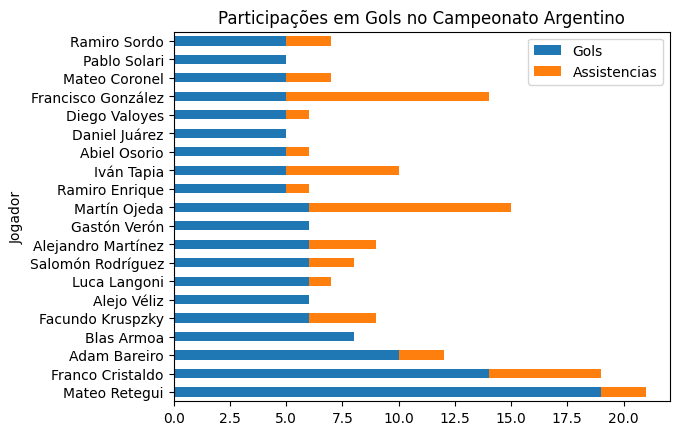

In [273]:
#Gráfico que mostra a soma de gols e assistência, orientado pelos maiores marcadores de gols
ax = argentina25[['Jogador', 'Gols', 'Assistencias']].sort_values('Gols', ascending=False).head(20).plot.barh(x='Jogador', stacked=True)
plt.title('Participações em Gols no Campeonato Argentino')
plt.ylabel('Jogador')
plt.show()

Text(0.5, 1.0, 'Relação entre o total de chutes, chutes a gol e o Gol')

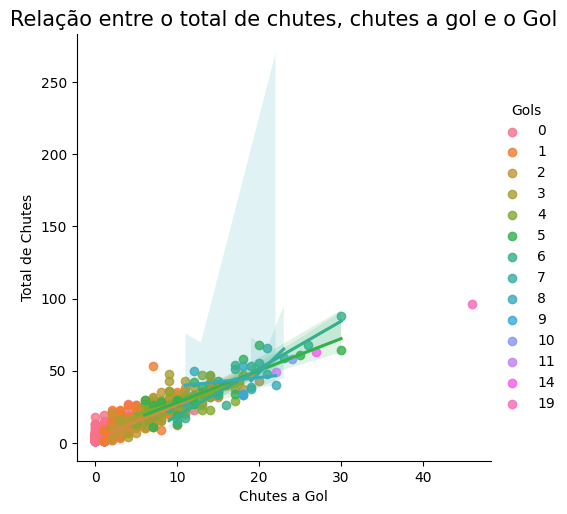

In [268]:
#Gráfico de correlação entre o total de chutes, chutes a gol e gols marcados.
sns.lmplot(x='Chutes a Gol', y='Total de Chutes', hue='Gols', data=argentina)
plt.xlabel('Chutes a Gol')
plt.ylabel('Total de Chutes')
plt.title("Relação entre o total de chutes, chutes a gol e o Gol", fontsize=15)

In [271]:
#Forte correlação entre chutes a gol e gols marcados
argentina['Chutes a Gol'].corr(argentina['Gols'])

0.8458994278484882